In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

from processing_functions import *

random_state= 42

pd.set_option('display.max_rows', 150)
pd.set_option('display.max_colwidth', None)  # Show full strings in columns

X_trainval, y_trainval, X_test, description, description_X_trainval, numerical_vars, cat_vars, binary_vars = load_data()

print("# training+validation obs: ", X_trainval.shape[0])
print("# test obs: ", X_test.shape[0])
print("# features", X_test.shape[1])

/Users/fdd838/Library/CloudStorage/OneDrive-Sky/Desktop/personal/home-credit-default-risk/processing_functions.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['CODE_GENDER'] = X['CODE_GENDER'].replace({'M': 1, 'F': 0, 'XNA': np.nan})
/Users/fdd838/Library/CloudStorage/OneDrive-Sky/Desktop/personal/home-credit-default-risk/processing_functions.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['CODE_GENDER'] = X['CODE_GENDER'].replace({'M': 1, 'F': 0, 'XNA': np.nan})


# training+validation obs:  307511
# test obs:  48744
# features 120


In [3]:
print(description[description.Feature=='TARGET'].Description.values[0])
vc = y_trainval.value_counts(dropna=False)
pct = (vc / len(y_trainval)) * 100
display(pd.DataFrame({'count': vc, 'percent': pct.round(2)}))

Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)


,count,percent
TARGET,,
0,282686,91.93
1,24825,8.07


In [4]:
display(description_X_trainval.TYPE.value_counts())
description_X_trainval.to_csv("data/preprocessed/description_training_set.csv", index=False)
description_X_trainval#.sort_values(['TYPE', 'NaN count'], ascending=[True, False])

TYPE
NUMERIC        73
BINARY         35
CATEGORICAL    12
Name: count, dtype: int64

,Feature,Description,Special,dtype,TYPE,nunique,NaN count,NaN %
0,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,,int64,BINARY,2,0,0.00
1,CODE_GENDER,Gender of the client,,float64,NUMERIC,2,4,0.00
2,FLAG_OWN_CAR,Flag if the client owns a car,,int64,BINARY,2,0,0.00
3,FLAG_OWN_REALTY,Flag if client owns a house or flat,,int64,BINARY,2,0,0.00
4,CNT_CHILDREN,Number of children the client has,,int64,NUMERIC,15,0,0.00
5,AMT_INCOME_TOTAL,Income of the client,,float64,NUMERIC,2548,0,0.00
6,AMT_CREDIT,Credit amount of the loan,,float64,NUMERIC,5603,0,0.00
7,AMT_ANNUITY,Loan annuity,,float64,NUMERIC,13672,12,0.00
8,AMT_GOODS_PRICE,For consumer loans it is the price of the goods for which the loan is given,,float64,NUMERIC,1002,278,0.09
9,NAME_TYPE_SUITE,Who was accompanying client when he was applying for the loan,,object,CATEGORICAL,7,1292,0.42


In [5]:
for col in cat_vars:
    print(f"{col}: {description[description.Feature==col].Description}")
    vc = X_trainval[col].value_counts(dropna=False)
    pct = (vc / len(X_trainval)) * 100
    display(pd.DataFrame({'count': vc, 'percent': pct.round(2)}))

NAME_TYPE_SUITE: 11    Who was accompanying client when he was applying for the loan
Name: Description, dtype: object


,count,percent
NAME_TYPE_SUITE,,
Unaccompanied,248526,80.82
Family,40149,13.06
"Spouse, partner",11370,3.70
Children,3267,1.06
Other_B,1770,0.58
NaN,1292,0.42
Other_A,866,0.28
Group of people,271,0.09


NAME_INCOME_TYPE: 12    Clients income type (businessman, working, maternity leave,)
Name: Description, dtype: object


,count,percent
NAME_INCOME_TYPE,,
Working,158774,51.63
Commercial associate,71617,23.29
Pensioner,55362,18.00
State servant,21703,7.06
Unemployed,22,0.01
Student,18,0.01
Businessman,10,0.00
Maternity leave,5,0.00


NAME_EDUCATION_TYPE: 13    Level of highest education the client achieved
Name: Description, dtype: object


,count,percent
NAME_EDUCATION_TYPE,,
Secondary / secondary special,218391,71.02
Higher education,74863,24.34
Incomplete higher,10277,3.34
Lower secondary,3816,1.24
Academic degree,164,0.05


NAME_FAMILY_STATUS: 14    Family status of the client
Name: Description, dtype: object


,count,percent
NAME_FAMILY_STATUS,,
Married,196432,63.88
Single / not married,45444,14.78
Civil marriage,29775,9.68
Separated,19770,6.43
Widow,16088,5.23
NaN,2,0.00


NAME_HOUSING_TYPE: 15    What is the housing situation of the client (renting, living with parents, ...)
Name: Description, dtype: object


,count,percent
NAME_HOUSING_TYPE,,
House / apartment,272868,88.73
With parents,14840,4.83
Municipal apartment,11183,3.64
Rented apartment,4881,1.59
Office apartment,2617,0.85
Co-op apartment,1122,0.36


OCCUPATION_TYPE: 28    What kind of occupation does the client have
Name: Description, dtype: object


,count,percent
OCCUPATION_TYPE,,
NaN,96391,31.35
Laborers,55186,17.95
Sales staff,32102,10.44
Core staff,27570,8.97
Managers,21371,6.95
Drivers,18603,6.05
High skill tech staff,11380,3.70
Accountants,9813,3.19
Medicine staff,8537,2.78


WEEKDAY_APPR_PROCESS_START: 32    On which day of the week did the client apply for the loan
Name: Description, dtype: object


,count,percent
WEEKDAY_APPR_PROCESS_START,,
TUESDAY,53901,17.53
WEDNESDAY,51934,16.89
MONDAY,50714,16.49
THURSDAY,50591,16.45
FRIDAY,50338,16.37
SATURDAY,33852,11.01
SUNDAY,16181,5.26


ORGANIZATION_TYPE: 40    Type of organization where client works
Name: Description, dtype: object


,count,percent
ORGANIZATION_TYPE,,
Business Entity Type 3,67992,22.11
NaN,55374,18.01
Self-employed,38412,12.49
Other,16683,5.43
Medicine,11193,3.64
Business Entity Type 2,10553,3.43
Government,10404,3.38
School,8893,2.89
Trade: type 7,7831,2.55


FONDKAPREMONT_MODE: 86    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
Name: Description, dtype: object


,count,percent
FONDKAPREMONT_MODE,,
NaN,210295,68.39
reg oper account,73830,24.01
reg oper spec account,12080,3.93
not specified,5687,1.85
org spec account,5619,1.83


HOUSETYPE_MODE: 87    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
Name: Description, dtype: object


,count,percent
HOUSETYPE_MODE,,
NaN,154297,50.18
block of flats,150503,48.94
specific housing,1499,0.49
terraced house,1212,0.39


WALLSMATERIAL_MODE: 89    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
Name: Description, dtype: object


,count,percent
WALLSMATERIAL_MODE,,
NaN,156341,50.84
Panel,66040,21.48
"Stone, brick",64815,21.08
Block,9253,3.01
Wooden,5362,1.74
Mixed,2296,0.75
Monolithic,1779,0.58
Others,1625,0.53


EMERGENCYSTATE_MODE: 90    Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
Name: Description, dtype: object


,count,percent
EMERGENCYSTATE_MODE,,
No,159428,51.84
NaN,145755,47.40
Yes,2328,0.76


In [6]:
X_trainval = feature_engineering(X_trainval)
X_test = feature_engineering(X_test)

/Users/fdd838/Library/CloudStorage/OneDrive-Sky/Desktop/personal/home-credit-default-risk/processing_functions.py:62: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['NAME_EDUCATION_TYPE'] = X['NAME_EDUCATION_TYPE'].replace(education_order).astype('int64')
/Users/fdd838/Library/CloudStorage/OneDrive-Sky/Desktop/personal/home-credit-default-risk/processing_functions.py:62: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  X['NAME_EDUCATION_TYPE'] = X['NAME_EDUCATION_TYPE'].replace(education_order).astype('int64')
/Users/fdd838/Library/CloudStorage/OneD

In [7]:
# Assume X_trainval, numerical_vars, binary_vars already exist in the environment
cols = numerical_vars + binary_vars
corr = X_trainval[cols].corr()

threshold = 0.8  # define "highly correlated"

# Also print the list of highly correlated variable pairs
high_corr_pairs = (
    corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
        .stack()
        .reset_index()
)
high_corr_pairs.columns = ["var_1", "var_2", "correlation"]
high_corr_pairs = high_corr_pairs[high_corr_pairs["correlation"].abs() >= threshold]

high_corr_pairs

,var_1,var_2,correlation
117,CNT_CHILDREN,CNT_FAM_MEMBERS,0.879161
319,AMT_CREDIT,AMT_GOODS_PRICE,0.986968
896,DAYS_EMPLOYED,FLAG_EMP_PHONE,-0.999755
1312,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.950842
1861,APARTMENTS_AVG,ELEVATORS_AVG,0.836958
1866,APARTMENTS_AVG,LIVINGAPARTMENTS_AVG,0.943952
1867,APARTMENTS_AVG,LIVINGAREA_AVG,0.913619
1870,APARTMENTS_AVG,APARTMENTS_MODE,0.973259
1875,APARTMENTS_AVG,ELEVATORS_MODE,0.822553
1880,APARTMENTS_AVG,LIVINGAPARTMENTS_MODE,0.930554


/Users/fdd838/Library/CloudStorage/OneDrive-Sky/Desktop/personal/home-credit-default-risk/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Class Imbalance Ratio (scale_pos_weight): 11.39
Best Iteration: 184
Best AUC: 0.7679469060671864


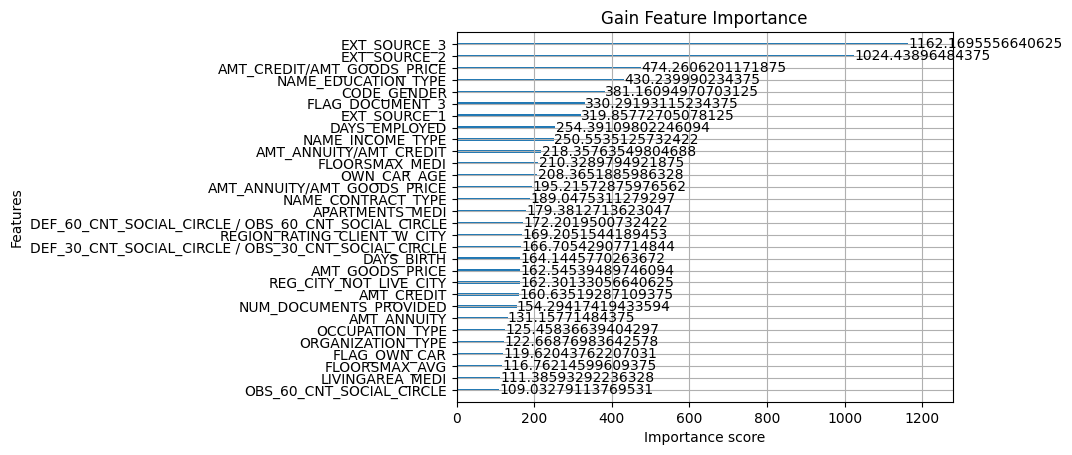


--- Computing SHAP Values ---


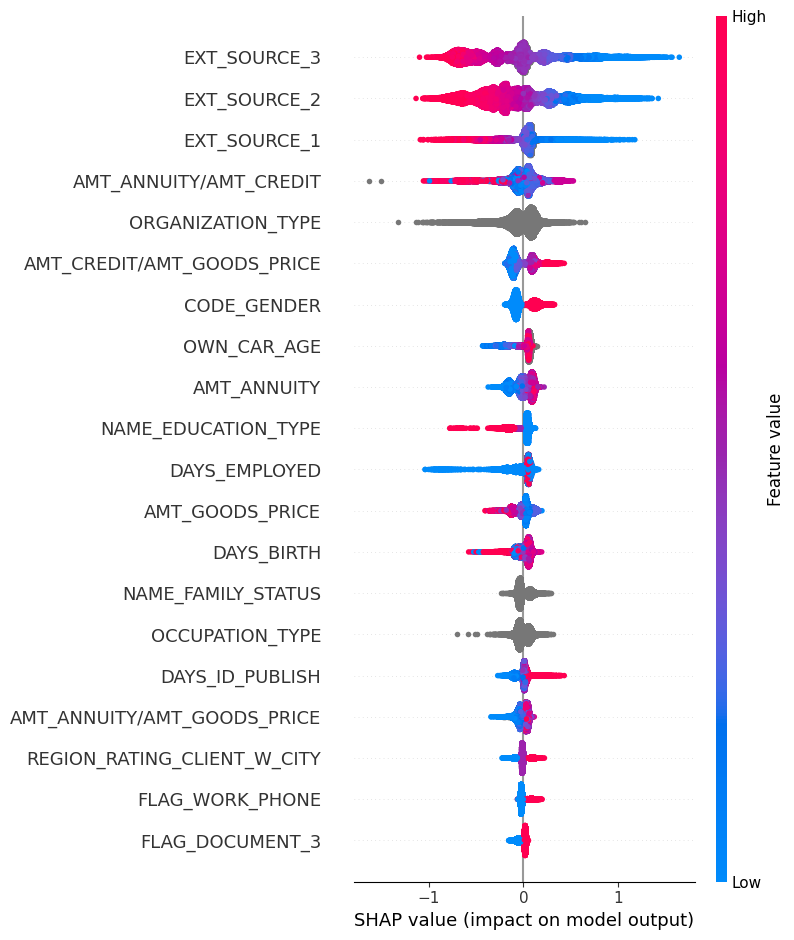

In [8]:
from sklearn.model_selection import train_test_split
import shap

X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=random_state, stratify=y_trainval)

# Calculate scale_pos_weight for imbalance
# Formula: sum(negative) / sum(positive)
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
scale_weight = n_neg / n_pos

print(f"Class Imbalance Ratio (scale_pos_weight): {scale_weight:.2f}")

# Create DMatrix
dsubtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dval = xgb.DMatrix(X_val, label=y_val, enable_categorical=True)

# ==========================================
# 3. Model Configuration & Training
# ==========================================

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    # Handling Imbalance
    'scale_pos_weight': scale_weight,
    
    # Handling Categorical Data
    # 'hist' tree method is required for efficient native categorical support
    'tree_method': 'hist', 
    
    # Null Handling: 
    # XGBoost automatically learns the best direction for NaNs. 
    # No explicit param needed, but you can set 'missing' if using a specific sentinel.
    
    'max_depth': 4,
    'eta': 0.1,
    'seed': 42
}

# Train the model
# Using the native train() method, not the sklearn fit() wrapper
results = {}
model = xgb.train(
    params=params,
    dtrain=dsubtrain,
    num_boost_round=500,
    evals=[(dsubtrain, 'train'), (dval, 'test')],
    early_stopping_rounds=10,
    evals_result=results,
    verbose_eval=False
)

print(f"Best Iteration: {model.best_iteration}")
print(f"Best AUC: {model.best_score}")

# 'gain' is usually the most informative metric (average gain in accuracy)
importance = model.get_score(importance_type='gain') 

# Plot native importance
xgb.plot_importance(model, importance_type='gain', title='Gain Feature Importance', max_num_features=30)
plt.show()

# ==========================================
# 5. SHAP Values
# ==========================================
print("\n--- Computing SHAP Values ---")


# Initialize Explainer
# model_output='raw' ensures we explain the log odds (margin)
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test set
# Note: For native DMatrix with categoricals, SHAP handles them automatically
shap_values = explainer.shap_values(dval)

# Plot Summary
plt.figure()
shap.summary_plot(shap_values, X_val)

In [9]:
importance = pd.Series(importance).sort_values(ascending=False).reset_index()
importance.columns = ['Feature', 'Importance']
importance['%Importance'] = importance['Importance']/importance['Importance'].sum()*100
importance['CUMSUM %Importance'] = importance['%Importance'].cumsum()
importance

,Feature,Importance,%Importance,CUMSUM %Importance
0,EXT_SOURCE_3,1162.169556,9.244235,9.244235
1,EXT_SOURCE_2,1024.438965,8.148686,17.392921
2,AMT_CREDIT/AMT_GOODS_PRICE,474.260620,3.772407,21.165328
3,NAME_EDUCATION_TYPE,430.239990,3.422254,24.587582
4,CODE_GENDER,381.160950,3.031865,27.619447
5,FLAG_DOCUMENT_3,330.291931,2.627238,30.246685
6,EXT_SOURCE_1,319.857727,2.544241,32.790926
7,DAYS_EMPLOYED,254.391098,2.023501,34.814427
8,NAME_INCOME_TYPE,250.553513,1.992976,36.807403
9,AMT_ANNUITY/AMT_CREDIT,218.357635,1.736880,38.544283


In [10]:
shap_importance = pd.DataFrame(pd.DataFrame(shap_values, columns=X_trainval.columns).abs().mean(axis=0).sort_values(ascending=False)).reset_index()
shap_importance.columns = ['Feature', 'shap_importance']
shap_importance['%shap_importance'] = shap_importance['shap_importance']/shap_importance['shap_importance'].sum()*100
shap_importance['CUMSUM %shap_importance'] = shap_importance['%shap_importance'].cumsum()
shap_importance

,Feature,shap_importance,%shap_importance,CUMSUM %shap_importance
0,EXT_SOURCE_3,0.389994,15.438201,15.438201
1,EXT_SOURCE_2,0.333255,13.192159,28.630360
2,EXT_SOURCE_1,0.152300,6.028890,34.659248
3,AMT_ANNUITY/AMT_CREDIT,0.130472,5.164822,39.824070
4,ORGANIZATION_TYPE,0.119482,4.729789,44.553860
5,AMT_CREDIT/AMT_GOODS_PRICE,0.109220,4.323555,48.877415
6,CODE_GENDER,0.099477,3.937889,52.815304
7,OWN_CAR_AGE,0.088225,3.492456,56.307758
8,AMT_ANNUITY,0.079059,3.129625,59.437386
9,NAME_EDUCATION_TYPE,0.076641,3.033876,62.471260


Best Iteration: 195
Best AUC: 0.7679382601696968


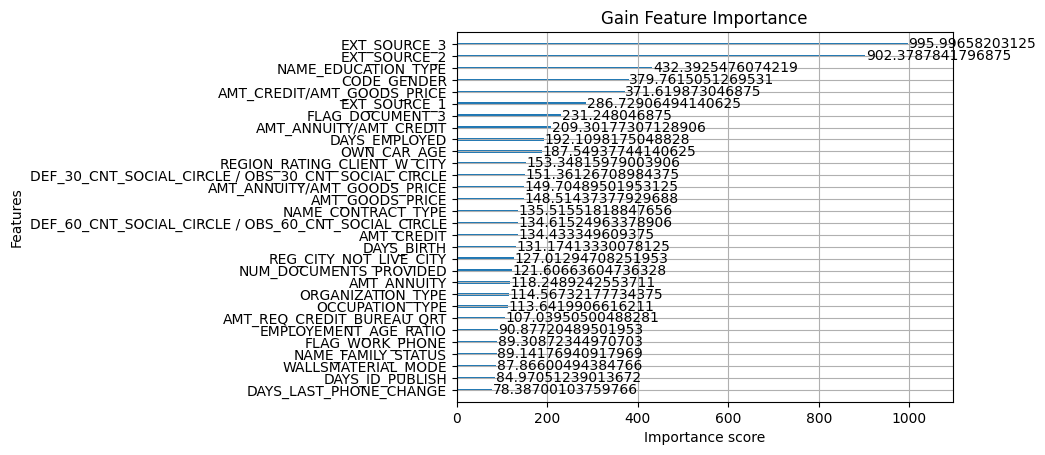


--- Computing SHAP Values ---


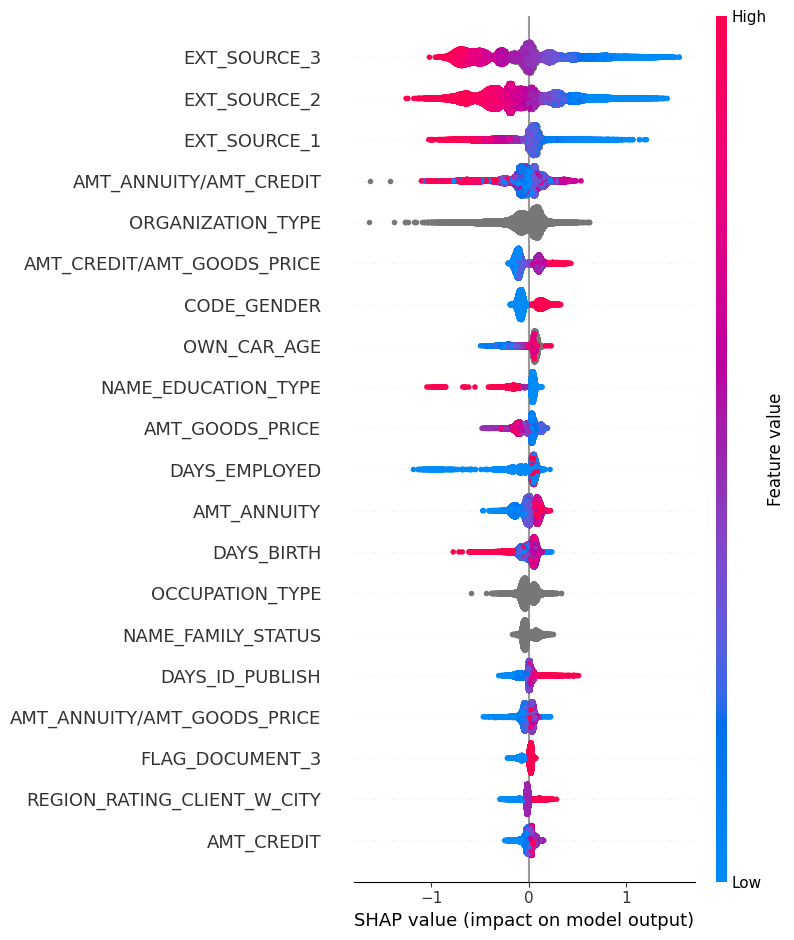

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval[shap_importance.iloc[:37].Feature.tolist()], y_trainval, test_size=0.2, random_state=random_state, stratify=y_trainval)

# Create DMatrix
dsubtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dval = xgb.DMatrix(X_val, label=y_val, enable_categorical=True)

# ==========================================
# 3. Model Configuration & Training
# ==========================================

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    # Handling Imbalance
    'scale_pos_weight': scale_weight,
    
    # Handling Categorical Data
    # 'hist' tree method is required for efficient native categorical support
    'tree_method': 'hist', 
    
    # Null Handling: 
    # XGBoost automatically learns the best direction for NaNs. 
    # No explicit param needed, but you can set 'missing' if using a specific sentinel.
    
    'max_depth': 4,
    'eta': 0.1,
    'seed': 42
}

# Train the model
# Using the native train() method, not the sklearn fit() wrapper
results = {}
model = xgb.train(
    params=params,
    dtrain=dsubtrain,
    num_boost_round=500,
    evals=[(dsubtrain, 'train'), (dval, 'test')],
    early_stopping_rounds=10,
    evals_result=results,
    verbose_eval=False
)

print(f"Best Iteration: {model.best_iteration}")
print(f"Best AUC: {model.best_score}")

# 'gain' is usually the most informative metric (average gain in accuracy)
importance = model.get_score(importance_type='gain') 

# Plot native importance
xgb.plot_importance(model, importance_type='gain', title='Gain Feature Importance', max_num_features=30)
plt.show()

# ==========================================
# 5. SHAP Values
# ==========================================
print("\n--- Computing SHAP Values ---")


# Initialize Explainer
# model_output='raw' ensures we explain the log odds (margin)
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test set
# Note: For native DMatrix with categoricals, SHAP handles them automatically
shap_values = explainer.shap_values(dval)

# Plot Summary
plt.figure()
shap.summary_plot(shap_values, X_val)

In [18]:
shap_importance = pd.DataFrame(pd.DataFrame(shap_values, columns=X_trainval[shap_importance.iloc[:37].Feature.tolist()].columns).abs().mean(axis=0).sort_values(ascending=False)).reset_index()
shap_importance.columns = ['Feature', 'shap_importance']
shap_importance['%shap_importance'] = shap_importance['shap_importance']/shap_importance['shap_importance'].sum()*100
shap_importance['CUMSUM %shap_importance'] = shap_importance['%shap_importance'].cumsum()
shap_importance

,Feature,shap_importance,%shap_importance,CUMSUM %shap_importance
0,EXT_SOURCE_3,0.391629,15.615608,15.615608
1,EXT_SOURCE_2,0.333910,13.314150,28.929758
2,EXT_SOURCE_1,0.156796,6.251996,35.181755
3,AMT_ANNUITY/AMT_CREDIT,0.132460,5.281632,40.463387
4,ORGANIZATION_TYPE,0.121428,4.841763,45.305149
5,AMT_CREDIT/AMT_GOODS_PRICE,0.113989,4.545129,49.850277
6,CODE_GENDER,0.102790,4.098583,53.948860
7,OWN_CAR_AGE,0.094116,3.752742,57.701603
8,NAME_EDUCATION_TYPE,0.075917,3.027082,60.728683
9,AMT_GOODS_PRICE,0.075618,3.015150,63.743832


In [23]:
save_submission(model, X_test[model.feature_names], submission_name="submission2")